<a href="https://colab.research.google.com/github/sriwulandari13/analisis_sentiment/blob/main/visualisasi_sentimen_gojek(notyet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

def load_data():
  data = pd.read_csv('hasil_lexiconbased')
  return data

In [2]:
df = load_data()
df.head()

,Text,Compound_Score,Sentiments
0,Kalau ujan gini aku kasian sama babang gojek y...,0.0000,Netral
1,Andre Rosiade menyebut investasi Telkomsel ke ...,0.4404,Positif
2,WKWK marah2in gojek,0.0000,Netral
3,WALAH Abang gojek yang ngehina BTS gimana dah ...,0.0000,Netral
4,Ternyata abang GoJek punya job desk nya nambah...,0.0000,Netral


3295


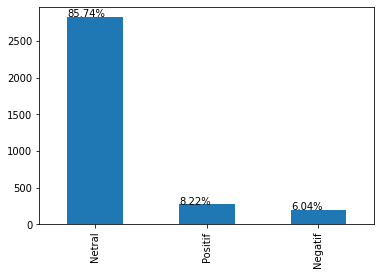

In [4]:
s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [5]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

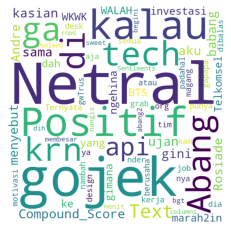

In [7]:
#wordcloud keseluruhan data
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(df))
#plot wordcloud
fig = plt.Figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

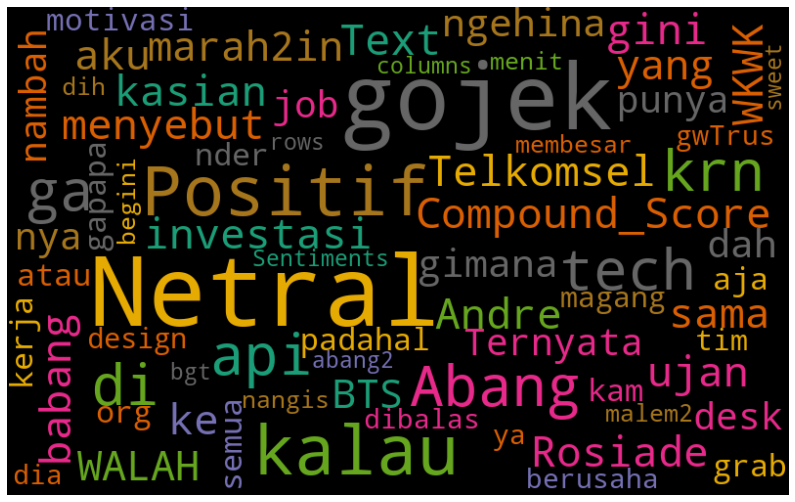

In [27]:
#wordcloud sentimen positif
def generate_wordcloud(all_words):
  global WordCloud
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100,
                        relative_scaling=0.5, colormap='Dark2').generate(str(df))
  
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([text for text in df['Text'][df.Sentiments == 'Positif']])
generate_wordcloud(all_words)

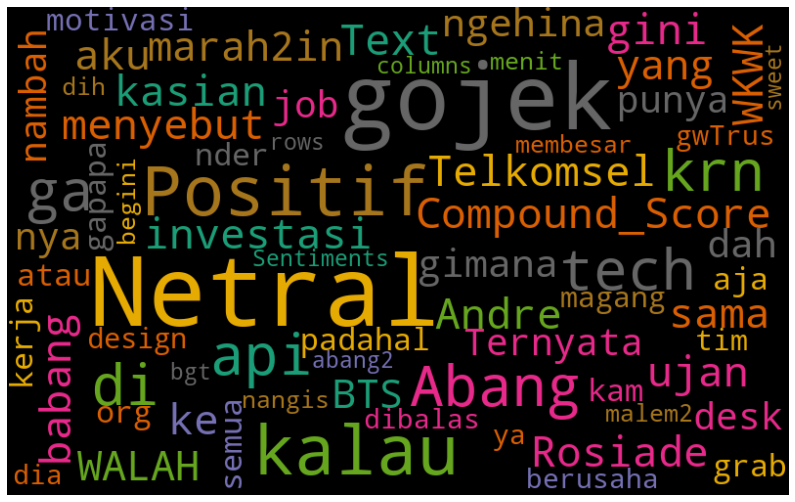

In [28]:
#wordcloud sentimen negatif
all_words = ' '.join([text for text in df['Text'][df.Sentiments == 'Netral']])
generate_wordcloud(all_words)

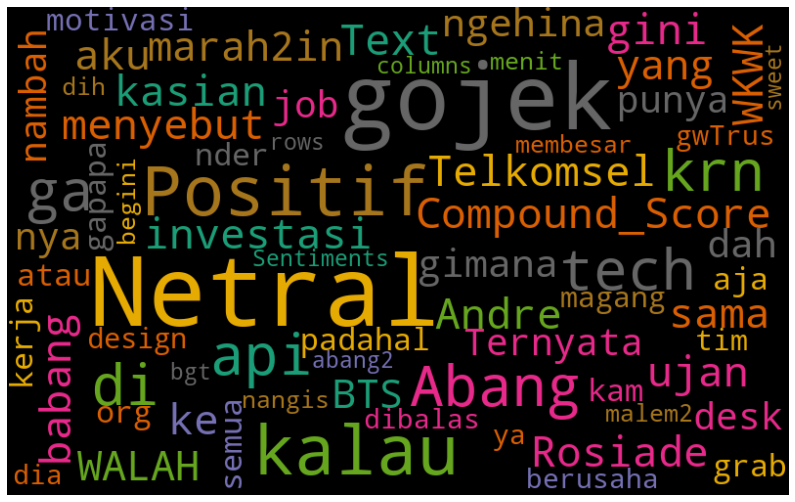

In [29]:
#wordcloud sentimen negatif
all_words = ' '.join([text for text in df['Text'][df.Sentiments == 'Negatif']])
generate_wordcloud(all_words)

## PROSES PERHITUNGAN AKURASI

In [30]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.6 MB/s 


In [31]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

In [32]:
analyser = SentimentIntensityAnalyzer()

In [34]:
pip install openpyxl==3.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 242 kB 6.9 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.0
    Uninstalling openpyxl-3.0.0:
      Successfully uninstalled openpyxl-3.0.0


In [ ]:
#masukkan data label manual (bikin lagi buat dibandingin sama data yg pertama)
dataset = pd.read_csv('')
dataset.head()

In [ ]:
scores = [analyser.polarity_scores(x) foor x in dataset['Text']]
dataset['Compound_Score'] = [x['compound'] for x in scores]
dataset.head()

In [ ]:
dataset.loc[dataset['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
dataset.loc[dataset['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
dataset.loc[dataset['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
dataset.head(100)

## CONFUSION MATRIX

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(dataset['klasifikasi'] dataset['Sentiments']))